In [12]:
def bisection(f, a , b, tol = 1e-6, max_etr = 1000):
    if f(a)*f(b)>0:
        return "There are no root between a & b "
    for etr in range(max_etr):
        c = (a+b)/2
        if f(a)*f(c)<0:
            b = c
        else:
            a = c
        if abs(a-b) < tol:
            return c, etr
    
    

In [13]:
def f1(x):
    return x**2 - 2

In [14]:
bisection(f1, 0, 2)

(1.4142141342163086, 20)

In [18]:
def itera(g, x0, tol = 1e-5, max_etr=1000):
    x = x0
    for etr in range(max_etr):
        x_new = g(x)
        if abs(x_new-x)<tol:
            return x_new
        x = x_new

In [19]:
def gauss_elimination(A, B):
    n = len(B)

    # Augmenting the matrix A with the column B
    augmented_matrix = [row + [B[i]] for i, row in enumerate(A)]

    # Forward elimination
    for i in range(n):
        # Make the diagonal element 1
        factor = augmented_matrix[i][i]
        for j in range(i, n + 1):
            augmented_matrix[i][j] /= factor

        # Make the other rows 0 in the current column
        for k in range(i + 1, n):
            factor = augmented_matrix[k][i]
            for j in range(i, n + 1):
                augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    # Back substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = augmented_matrix[i][n]
        for j in range(i + 1, n):
            x[i] -= augmented_matrix[i][j] * x[j]

    return x

In [21]:
import numpy as np
A = np.array([[2, 5, 0, -4, 6],
              [-4, -4, -3, 7, 36],
              [-6, -3, -7, -6, 35],
              [-1, 2, -6, 5, 63]])
A

array([[ 2,  5,  0, -4,  6],
       [-4, -4, -3,  7, 36],
       [-6, -3, -7, -6, 35],
       [-1,  2, -6,  5, 63]])

In [22]:
b = A[:,-1]
A = A[:,:-1]

In [24]:
gauss_elimination(A,b)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [25]:
def row_swap(M, i, j):
    mat = M.copy()
    mat[i] = M[j]
    mat[j] = M[i]
    return mat

def row_scale(M, row, scaler):
    M[row] = M[row]*scaler
    return M

def row_add(M, i, j, scaler = 1):
    mat = M.copy()
    mat[i] = mat[i]*scaler + mat[j]
    return mat

In [26]:
def row_reduction(matrix):
    """
    Perform row reduction (Gaussian elimination) on the given matrix.

    Parameters:
    - matrix: 2D NumPy array representing the matrix
    """
    rows, cols = matrix.shape
    for pivot_row in range(min(rows, cols)):
        # Ensure the pivot element is nonzero
        if matrix[pivot_row, pivot_row] == 0:
            non_zero_row = np.argmax(matrix[pivot_row:, pivot_row]) + pivot_row
            row_swap(matrix, pivot_row, non_zero_row)

        # Make the pivot element 1
        pivot_value = matrix[pivot_row, pivot_row]
        row_scale(matrix, pivot_row, 1 / pivot_value)

        # Eliminate nonzero values below the pivot
        for i in range(pivot_row + 1, rows):
            multiplier = matrix[i, pivot_row]
            row_add(matrix, pivot_row, i, -multiplier)

def forward_substitution(matrix, b):
    """
    Perform forward substitution to solve for variables in a lower triangular system.

    Parameters:
    - matrix: Lower triangular matrix (2D NumPy array)
    - b: 1D NumPy array representing the right-hand side of the system
    """
    n = len(b)
    x = np.zeros(n)
    for i in range(n):
        x[i] = b[i] - np.dot(matrix[i, :i], x[:i])
    return x

def back_substitution(matrix, b):
    """
    Perform back substitution to solve for variables in an upper triangular system.

    Parameters:
    - matrix: Upper triangular matrix (2D NumPy array)
    - b: 1D NumPy array representing the right-hand side of the system
    """
    n = len(b)
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(matrix[i, i + 1:], x[i + 1:])) / matrix[i, i]
    return x


In [27]:
def solve_linear_system(A, b):
    """
    Solve a linear system Ax = b using Gaussian elimination.

    Parameters:
    - A: Coefficient matrix (2D NumPy array)
    - b: Right-hand side vector (1D NumPy array)

    Returns:
    - x: Solution vector
    """
    # Combine A and b into an augmented matrix
    augmented_matrix = np.column_stack((A, b))

    # Apply row reduction
    row_reduction(augmented_matrix)

    # Separate the augmented matrix back into A and b
    A_reduced = augmented_matrix[:, :-1]
    b_reduced = augmented_matrix[:, -1]

    # Solve the system using back substitution
    y = forward_substitution(A_reduced, b_reduced)
    x = back_substitution(A_reduced, y)

    return x

In [28]:
# Given data
data = {
    0: 200,
    1: 400,
    2: 650,
    3: 850,
    4: 950
}

# Given limiting value
L = 1000

In [38]:
# Transform the data
X_values = np.array(list(data.keys()))
Y_values = np.log(L / np.array(list(data.values())) - 1)

# Function to perform linear fit
def linear_fit(X_values, Y_values):
    n = len(X_values)
    
    sum_X = np.sum(X_values)
    sum_Y = np.sum(Y_values)
    sum_X_squared = np.sum(X_values**2)
    sum_XY = np.sum(X_values * Y_values)

    A = np.array([[n, sum_X], [sum_X, sum_X_squared]])
    B = np.array([sum_Y, sum_XY])

    # Solve the system using Gaussian elimination
    Av = solve_linear_system(A,B)

    return Av

In [41]:
A,B = linear_fit(X_values, Y_values)

A = 0.01883823485805247, B = -0.36005109480229786


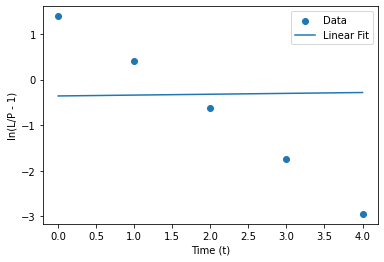

In [44]:
# # Extract A and B from the coefficients
# A = A_coeff
# B = B_coeff

# Print the coefficients
print(f'A = {A}, B = {B}')

# Plot the data and the linear fit
plt.scatter(X_values, Y_values, label='Data')
plt.plot(X_values, A * X_values + B, label='Linear Fit')

plt.xlabel('Time (t)')
plt.ylabel('ln(L/P - 1)')
plt.legend()
plt.show()


In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
ans

array([27., -5., -5.,  7.])

In [35]:
A

array([[ 2,  5,  0, -4],
       [-4, -4, -3,  7],
       [-6, -3, -7, -6],
       [-1,  2, -6,  5]])

In [36]:
b

array([ 6, 36, 35, 63])